In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Incorporate kind of error
from urllib.error import HTTPError

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
codes = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
dates = []
latitud = []
longitude = []

# Set settings
settings = {
    "units": "metrics",
    "appid": api_key
}

# Set params
params = {
"summary": ["main.temp_max", "main.humidity","wind.speed", "clouds.all", "dt"]
}


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    data_city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = data_city.city_name
    city_code = data_city.country_code
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        try :
            data = owm.get_current(city + ',' + city_code, **settings)
            data_df = data(*params["summary"])
            max_temp.append(data_df[0])
            humidity.append(data_df[1])
            wind_speed.append(data_df[2])
            clouds.append(data_df[3])
            dates.append(data_df[4])
            cities.append(city)
            codes.append(city_code)
            latitud.append(lat_lng[0])
            longitude.append(lat_lng[1])
            print(city + '_' + city_code + ' weather data found')
            
        except HTTPError :
            print(city + '_' + city_code + ' not found.')

bambous virieux_mu weather data found
hermanus_za weather data found
belushya guba_ru not found.
georgetown_sh weather data found
adre_td weather data found
busselton_au weather data found
bluff_nz weather data found
tuktoyaktuk_ca weather data found
tigil_ru weather data found
aksarka_ru weather data found
castro_cl weather data found
new norfolk_au weather data found
goderich_sl not found.
tuatapere_nz weather data found
hobart_au weather data found
daru_pg weather data found
arraial do cabo_br weather data found
khatanga_ru weather data found
kavaratti_in weather data found
saleaula_ws not found.
aneho_tg weather data found
sistranda_no weather data found
ushuaia_ar weather data found
cape town_za weather data found
sao jose do belmonte_br weather data found
thompson_ca weather data found
novosheshminsk_ru weather data found
vaini_to weather data found
seoul_kr weather data found
butaritari_ki weather data found
kalemie_cd weather data found
san patricio_mx weather data found
nkhata

bathsheba_bb weather data found
ahipara_nz weather data found
huilong_cn weather data found
grand gaube_mu weather data found
barentsburg_sj not found.
itaueira_br weather data found
yambio_sd not found.
novopokrovka_ru weather data found
bilibino_ru weather data found
santa maria_cv weather data found
cadillac_us weather data found
olinda_br weather data found
tairua_nz weather data found
tiksi_ru weather data found
takoradi_gh weather data found
port-de-paix_ht not found.
sisimiut_gl weather data found
port hardy_ca weather data found
vilhena_br weather data found
sorland_no weather data found
mangrol_in weather data found
belushya guba_ru not found.
macusani_pe weather data found
aksu_cn weather data found
horni plana_cz weather data found
miajadas_es weather data found
sao joao da barra_br weather data found
havre-saint-pierre_ca weather data found
guisa_cu weather data found
gannan_cn weather data found
tongren_cn weather data found
lavumisa_sz weather data found
shelburne_ca weat

calabozo_ve weather data found
lata_sb not found.
airai_pw not found.
fortuna_us weather data found
san jose_gt weather data found
faanui_pf weather data found
talnakh_ru weather data found
maroantsetra_mg weather data found
coro_ve weather data found
lasa_cn not found.
cortez_us weather data found
nizhneyansk_ru not found.
najran_sa weather data found
itoman_jp weather data found
taolanaro_mg not found.
nalut_ly weather data found
soligalich_ru weather data found
sovetskiy_ru weather data found
mabini_ph weather data found
los zacatones_mx weather data found
semnan_ir weather data found
yulara_au weather data found
bengkulu_id not found.
illoqqortoormiut_gl not found.
kristiinankaupunki_fi not found.
ambon_id weather data found
mataura_pf not found.
palabuhanratu_id not found.
vao_nc weather data found
prince rupert_ca weather data found
taolanaro_mg not found.
belluru_in weather data found
mossendjo_cg weather data found
amderma_ru not found.
lagoa_pt weather data found
bolungarvik_i

In [35]:
# I make a DataFrame
weather_df = pd.DataFrame({'City': cities, 'Cloudiness': clouds, 'Country': codes, 'Dates': dates, 'Humidity': humidity, 'Lat': latitud, 'Lng': longitude, 'Max Temp': max_temp, 'Wind Speed': wind_speed})

In [36]:
# Print the city count to confirm sufficient count
weather_df.count()

City          551
Cloudiness    551
Country       551
Dates         551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [37]:
#I display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Dates,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambous virieux,75,mu,1570749537,78,-30.069150,82.193751,295.93,6.700
1,hermanus,93,za,1570749537,84,-42.870719,16.655278,285.93,1.340
2,georgetown,97,sh,1570749538,76,-10.310935,-11.359876,295.66,8.421
3,adre,51,td,1570749538,54,14.172782,22.352537,299.81,0.650
4,busselton,86,au,1570749538,76,-44.146547,95.998665,290.93,3.681


In [38]:
# Output and Save the csv
weather_df.to_csv('Resources/weatherdata.csv')

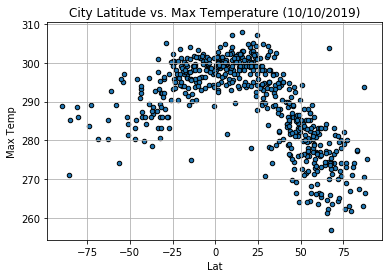

In [52]:
#Making a plot: Latitude vs Max Temperature
Lat_vs_Temp = weather_df.plot.scatter("Lat","Max Temp", title="City Latitude vs. Max Temperature (10/10/2019)", grid=True, facecolor="b", edgecolors="black")
plt.savefig("Images/Latitude_Temperature")

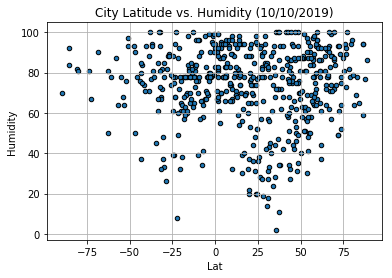

In [53]:
#Making a plot: Latitude vs Humidity
Lat_vs_Hum = weather_df.plot.scatter("Lat","Humidity", title="City Latitude vs. Humidity (10/10/2019)", grid=True, facecolor="b", edgecolors="black")
plt.savefig("Images/Latitude_Humidity")

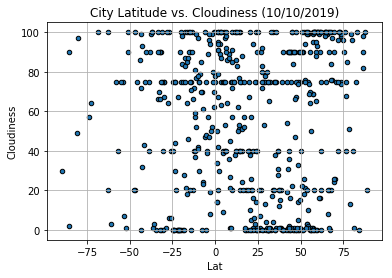

In [54]:
#Making a plot: Latitude vs Cloudiness
Lat_vs_Cloud = weather_df.plot.scatter("Lat","Cloudiness", title="City Latitude vs. Cloudiness (10/10/2019)", grid=True, facecolor="b", edgecolors="black")
plt.savefig("Images/Latitude_Cloudiness")

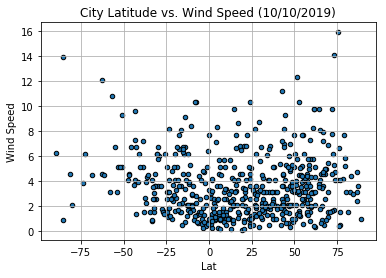

In [55]:
#Making a plot: Latitude vs Wind Speed
Lat_vs_Wind = weather_df.plot.scatter("Lat","Wind Speed", title="City Latitude vs. Wind Speed (10/10/2019)", grid=True, facecolor="b", edgecolors="black")
plt.savefig("Images/Latitude_Wind")